In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:100% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:22pt;}
div.text_cell_render.rendered_html{font-size:18pt;}
div.text_cell_render.rendered_html{font-size:15pt;}
div.output {font-size:18pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:18pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:18pt;padding:5px;}
table.dataframe{font-size:18px;}
</style>
"""))

# ※naver open API를 활용하여 네이버지식인에 "전주여행"과 "경주여행" 검색 →품사태깅 백업, 명사만 추출(특수문자 제외) → 빈도 분석 / (DataFrame) → 빈도 시각화(워드클라우드, Text) → Word2Vec 

- 중간 과정들 csv or txt 파일로 저장

# 1. 네이버 open API를 활용하여 검색 추출
- 검색어, no(번호), title(타이틀), link, description, title + ' ' + description


In [5]:
# env 파일 확인하기

import os
%ls .env

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 3664-591E

 C:\ai_x\source\07_자연어처리 디렉터리

2025-06-18  오후 05:47                56 .env
               1개 파일                  56 바이트
               0개 디렉터리  104,902,868,992 바이트 남음


In [6]:
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
# pip install python-dotenv (환경변수를 쓰기 위한 라이브러리)
# pip install python-decouple(주피터 환경에서 안 될 수 있음)
from decouple import config
print(config('Client_ID'))

SxIc_HSA3r4D_7dvoq1p


# 1. "전주여행","경주여행" 검색 데이터 불러오기 (네이버 API)

In [8]:
# 전주여행 데이터 검색 (네이버 API) 불러오기
import requests
import pandas as pd
import json
import sys
import urllib.request
client_id = os.getenv('Client_ID')
client_secret = os.getenv('Client_Secret')

keyword1 = '전주여행'
cnt1=100
url1 = f"https://openapi.naver.com/v1/search/kin.json?query={keyword1}&display={cnt1}"
headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret
}

response = requests.get(url1,headers=headers)

# json 파싱
data1 = response.json()
items1 = data1['items']

# 리스트 추출
items_list1 = []
for item in items1:
    items_list1.append([item.get('title').replace('<b>','').replace('</b>',''), #item['title']로 써도 됨
                       item.get('link'),
                       item.get('description').replace('<b>','').replace('</b>','')
                      ])
df1 = pd.DataFrame(items_list1, columns=['title','link','description'])
df1

,title,link,description
0,전주 가볼만한곳 추천 받아요,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 추억의 7080 #다양한체험 #7080감성 #추억여행 #테마박물관 #유익한시...
1,전주여행갈려고하는데요!,https://kin.naver.com/qna/detail.naver?d1id=9&...,전주여행을 갈려고하는데요!아는사람과 갈려고하는데 호텔은 좋은가격에 정했고~ 음..2...
2,전주 1박 2일 여행 관련 질문~,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 전주 여행을 계획하고 계시다니 정말 좋은 선택을 하셨네요. 전주는 한옥마을과...
3,중2 여학생 친구와 전주여행,https://kin.naver.com/qna/detail.naver?d1id=9&...,안녕하세요!중 2(15살)여학생입니다.친한친구와 둘이서 전주 여행을 가기로 했는데 ...
4,부모닝 모시고 전주여행,https://kin.naver.com/qna/detail.naver?d1id=9&...,"부모님 모시고 전주여행가려는데 명소, 식당 추천부탁드립니다 -------------..."
...,...,...,...
95,1박2일 전주 여행코스,https://kin.naver.com/qna/detail.naver?d1id=12...,... 질문하신 [전주 여행 코스] 관련 답변드리겠습니다. 가족 분들과 함께하는 전...
96,당일치기 전주여행코스,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 처음으로 전주여행을 가는거라서 아는 것이 많이 없어요.. 일단 전주 한옥마을...
97,"초등 아이랑 전주여행 코스, 맛집 추천 부탁합니다",https://kin.naver.com/qna/detail.naver?d1id=12...,... 아이와 전주 여행을 계획하고 계시군요! 전주에서 아이와 함께 가볼만한 곳 몇...
98,(급합니다ㅠㅠ) 전주 여행코스,https://kin.naver.com/qna/detail.naver?d1id=12...,... 전주여행코스 추천드립니다. ^^ 안녕하세요. 여행전문블로거 쭈니아빠입니다. ...


In [9]:
# 경주여행 데이터 검색 (네이버 API) 불러오기
import requests
import pandas as pd
import json
import sys
import urllib.request
client_id = os.getenv('Client_ID')
client_secret = os.getenv('Client_Secret')

keyword2 = '경주여행'
cnt2=100
url2 = f"https://openapi.naver.com/v1/search/kin.json?query={keyword2}&display={cnt2}"
headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret
}

response = requests.get(url2,headers=headers)

# json 파싱
data2 = response.json()
items2 = data2['items']

# 리스트 추출
items_list2 = []
for item in items2:
    items_list2.append([item.get('title').replace('<b>','').replace('</b>',''), #item['title']로 써도 됨
                       item.get('link'),
                       item.get('description').replace('<b>','').replace('</b>','')
                      ])
df2 = pd.DataFrame(items_list2, columns=['title','link','description'])
df2

,title,link,description
0,추석에 경주 여행,https://kin.naver.com/qna/detail.naver?d1id=9&...,"추석에 경주 여행 가는거 어떻게 생각하시나요? 서울에서 버스를 타고 갈 경우, 버스..."
1,1박2일 경주 여행 일정 짜주세요,https://kin.naver.com/qna/detail.naver?d1id=9&...,"1박2일 경주 여행 일정 짜주세요 질문자님, 경주에서의 1박 2일 여행을 계획 중이..."
2,어머니랑 1박2일 경주여행,https://kin.naver.com/qna/detail.naver?d1id=9&...,이제 5월달 어버이날을 위해 어머니랑 경주 여행을 할려고합니다 ㅎㅎ 놀러갈데는 다 ...
3,경주 여행,https://kin.naver.com/qna/detail.naver?d1id=9&...,"5월6,7,8일 경주 여행을 가는데요 동궁과월지와 월정교 야경을 보고 싶은데 7일에..."
4,경주여행 30만원,https://kin.naver.com/qna/detail.naver?d1id=9&...,경주 여행 2박3일 남자친구랑 가는데 숙소랑 ktx비는 다 냈고 제 개인적으로 30...
...,...,...,...
95,역사에무지한 경주여행코스 부탁 드려요,https://kin.naver.com/qna/detail.naver?d1id=9&...,... 이번에 여동생이랑 경주여행1박2일 하려고 하는데요 부끄럽지만 고등학생때 역사...
96,경주여행 코스추천,https://kin.naver.com/qna/detail.naver?d1id=9&...,경주 여행 가려고 합니다. 4우러 30일 새벽에 출발 해서 대명 콘도에 묵을 예정인...
97,경주여행코스(2박3일),https://kin.naver.com/qna/detail.naver?d1id=9&...,"5월23일~5월25일 경주 여행코스 추천 해주세요. 1. 대상 : 어머니, 자녀 (..."
98,경주여행 날씨..,https://kin.naver.com/qna/detail.naver?d1id=8&...,10월 8일날 경주여행 가려는데 날씨가어떤가요 10월 8일 경주 날씨는 대체로 흐릴...


## 1-1.  "전주여행","경주여행" 검색 데이터 저장하기(to_scv)

In [74]:
df1_des = df1[['title','description']]

df1_des.to_csv('test/전주여행 검색결과.csv',encoding='utf-8' )
# df1_des

In [75]:
df2_des = df2[['title','description']]

df2_des.to_csv('test/경주여행 검색결과.csv',encoding='utf-8')
# df2_des

# 2. 품사태깅

In [76]:
df1 = pd.read_csv('test/전주여행 검색결과.csv')
text1 =df1['title'] + ' ' + df1['description']
text1

0     전주 가볼만한곳 추천 받아요 ... 추억의 7080 #다양한체험 #7080감성 #추...
1     전주여행갈려고하는데요! 전주여행을 갈려고하는데요!아는사람과 갈려고하는데 호텔은 좋은...
2     전주 1박 2일 여행 관련 질문~ ... 전주 여행을 계획하고 계시다니 정말 좋은 ...
3     중2 여학생 친구와 전주여행 안녕하세요!중 2(15살)여학생입니다.친한친구와 둘이서...
4     부모닝 모시고 전주여행 부모님 모시고 전주여행가려는데 명소, 식당 추천부탁드립니다 ...
                            ...                        
95    1박2일 전주 여행코스 ... 질문하신 [전주 여행 코스] 관련 답변드리겠습니다. ...
96    당일치기 전주여행코스 ... 처음으로 전주여행을 가는거라서 아는 것이 많이 없어요....
97    초등 아이랑 전주여행 코스, 맛집 추천 부탁합니다 ... 아이와 전주 여행을 계획하...
98    (급합니다ㅠㅠ) 전주 여행코스 ... 전주여행코스 추천드립니다. ^^ 안녕하세요. ...
99    전주여행 순서좀 알려주세요~ 전주여행을 하려고 하는데요 덕진공원, 전주동물원, 한옥...
Length: 100, dtype: object

In [58]:
df2 = pd.read_csv('test/경주여행 검색결과.csv')
text2 =df2['title'] + ' ' + df2['description']
text2

0     추석에 경주 여행 추석에 경주 여행 가는거 어떻게 생각하시나요? 서울에서 버스를 타...
1     1박2일 경주 여행 일정 짜주세요 1박2일 경주 여행 일정 짜주세요 질문자님, 경주...
2     어머니랑 1박2일 경주여행 이제 5월달 어버이날을 위해 어머니랑 경주 여행을 할려고...
3     경주 여행 5월6,7,8일 경주 여행을 가는데요 동궁과월지와 월정교 야경을 보고 싶...
4     경주여행 30만원 경주 여행 2박3일 남자친구랑 가는데 숙소랑 ktx비는 다 냈고 ...
                            ...                        
95    경주여행 코스추천 경주 여행 가려고 합니다. 4우러 30일 새벽에 출발 해서 대명 ...
96    경주여행 날씨.. 10월 8일날 경주여행 가려는데 날씨가어떤가요 10월 8일 경주 ...
97    경주여행코스(2박3일) 5월23일~5월25일 경주 여행코스 추천 해주세요. 1. 대...
98    경주 여행가려구요 경주 여행 가려고 하는데... 11월 초에나 갈 것 같아요. 그쯤...
99    경주 여행코스, 신경주역 경주역 질문 드려요 안녕하세요 20대 여성이고요 친구랑 여...
Length: 100, dtype: object

In [77]:
mecab = MeCab()
tagged2 = text.apply(lambda x : mecab.pos(x))
type(tagged2)

pandas.core.series.Series

In [78]:
import nltk
from mecab import MeCab
mecab = MeCab()
tagged1 = text1.apply(lambda x : mecab.pos(x))
type(tagged1)

pandas.core.series.Series

## 2-1. 품사태깅 데이터 저장

In [79]:
tagged1.to_csv('test/전주여행 품사태깅(시리즈).csv',encoding='utf-8')

In [80]:
tagged2.to_csv('test/경주여행 품사태깅(시리즈).csv',encoding='utf-8')

# 3.  명사만 추출 (특수문자 제외)

In [66]:
first = []
for token in tagged1:
    nouns=[]
    for word, tag in token:
        if tag.startswith('NN'):
            nouns.append(word)
    first.append(nouns)
first
# first = tagged1.apply(lambda tokens: [word for word, pos in tokens if pos.startswith('NN')])
# first

[['전주',
  '만',
  '곳',
  '추천',
  '추억',
  '다양',
  '체험',
  '감성',
  '추억',
  '여행',
  '테마',
  '박물관',
  '유익',
  '시간',
  '전북',
  '전북',
  '투어',
  '패스',
  '통합',
  '용권',
  '전북',
  '핫',
  '플',
  '여행지',
  '다양',
  '체험',
  '카페이',
  '용추',
  '전주',
  '여행',
  '필수',
  '편안',
  '날',
  '감사'],
 ['전주',
  '여행',
  '전주',
  '여행',
  '사람',
  '호텔',
  '가격',
  '박',
  '일',
  '여행',
  '얼마',
  '정도',
  '맛집',
  '거',
  '카페',
  '거',
  '추천',
  '전주',
  '여행',
  '계획',
  '중',
  '한옥',
  '마을',
  '근처'],
 ['전주',
  '박',
  '일',
  '여행',
  '관련',
  '질문',
  '전주',
  '여행',
  '계획',
  '선택',
  '한옥마을',
  '자연',
  '경관',
  '음식',
  '동네',
  '시간',
  '수',
  '거',
  '한옥',
  '마을',
  '근처',
  '수',
  '장소'],
 ['중',
  '여학생',
  '친구',
  '전주',
  '여행',
  '안녕',
  '중',
  '살',
  '여학생',
  '친구',
  '전주',
  '여행',
  '일본',
  '애니',
  '전주',
  '오타쿠',
  '갈만',
  '곳'],
 ['부모',
  '닝',
  '전주',
  '여행',
  '부모',
  '전주',
  '여행',
  '명소',
  '식당',
  '추천',
  '부탁',
  '전주',
  '한옥마을',
  '완산구',
  '덕진구',
  '추억',
  '장소'],
 ['박',
  '일',
  '전주',
  '여행',
  '이번',
  '주',
  '토',
  '월',
  '박',
  '일',
  

In [188]:
jeonju_data = ' '.join( [' '.join([word for word in row if word not in ('전주','여행')]) for row in first])
jeonju_data

'만 곳 추천 추억 다양 체험 감성 추억 테마 박물관 유익 시간 전북 전북 투어 패스 통합 용권 전북 핫 플 여행지 다양 체험 카페이 용추 필수 편안 날 감사 사람 호텔 가격 박 일 얼마 정도 맛집 거 카페 거 추천 계획 중 한옥 마을 근처 박 일 관련 질문 계획 선택 한옥마을 자연 경관 음식 동네 시간 수 거 한옥 마을 근처 수 장소 중 여학생 친구 안녕 중 살 여학생 친구 일본 애니 오타쿠 갈만 곳 부모 닝 부모 명소 식당 추천 부탁 한옥마을 완산구 덕진구 추억 장소 박 일 이번 주 토 월 박 일 여자 친구 경로 토요일 비 실내 데이트 가능 곳 감사 숙소 한옥 마을 근처 토 한옥마을 구경 후 박 일 저녁 주천 산책 길 한옥 마을 근처 야경 것 일정 관심 테마 사진 카페 체험 등 맞춤 추천 수 코스 추천 영화제 기간 일정 박 일 코스 추천 주목적 전주국 영화제 곳 거 만 곳 알짜배기 추천 전 커플 추천 숙소 거리 맛집 등등 추천 감사 한옥마을 겁니다 답변 도움 한옥마을 한옥마을 맛집 추천 추석 일 전 그때 한옥마을 관광지 문 추석 당일 문 이벤트 진행 중 화 일 한국관광공사 숙박 세일 페스타 이벤트 진행 중 원 전 연령 렌트카 추천 이번 박 일 살 만 세 전 연령 자동차 추천 부탁 가격 일 렌트 정도 세 이상 렌트 가능 자동차 가격 포항 포항 기차 버스 안녕 주 포항 때 기차 버스 장단점 방법 결정 데 가지 요소 고려 필요 펜션 한옥 곳 이번 남자 친구 박 일 펜션 한옥 마을 근처 한옥 펜션 쪽 만 데 내부 정감 분위기 것 답변 부탁 주세요 한옥마을 완산구 덕진구 추억 장소 완산구 덕진구 여행지 월 달 엄마 계획 중 답변 부탁 기차 고속버스 중 걸 게 도착 관광 때 이용 수 교통수단 게 숙소 추천 서울 당일치기 당일치기 계획 중 전주역 한옥마을 방법 당일치기 코스 전주역 한옥마을 방법 택시 버스 전주역 한옥마을 택시 박 일 경비 보통 박 일 경비 얼마 정도 숙소 박 원 데 건가요 질문 도움 답변 박 일 예산 원 내외 숙소 원 박 일 커플 도움 남자 친구 차 

In [174]:
second = []
for token in tagged2:
    nouns=[]
    for word, tag in token:
        if tag.startswith('NN'):
            nouns.append(word)
    second.append(nouns)
# second
# second = tagged2.apply(lambda tokens: [word for word, pos in tokens if pos.startswith('NN')])
# second

In [205]:
gyeongju_data = ' '.join( [' '.join([word for word in row if word not in ('경주','여행')]) for row in second])
gyeongju_data

'추석 추석 거 생각 서울 버스 경우 버스 버스 전용 차선 운행 질문 추석 관련 답변 첨성대 석굴암 불국사 등 유적지 연중무휴 박 일 일정 박 일 일정 문자 박 일 계획 중 소록 스테이 아래 일정 정리 박 일 일정 감성 어머니 박 일 월 달 어버이날 어머니 데 펜션 안녕 어버이날 어머니 계획 중 특별 시간 마음 월 일 동궁 월지 월 정교 야경 일 정상 운영 휴무일 관람 방해 정도 날씨 상황 통제 경우 관람 가능 원 박 일 남자 친구 숙소 비 개인 원 부족 원 계획 예산 집행 수 부족 수 맛집 맛집 추천 부탁 가이드 교통편 맛집 볼거리 한국 역사 문화 숨 도시 명소 년 봄 데 만 곳 추천 데 만 곳 추천 추천 지 월드 국립 박물관 황리 길 첨성대 불국사 엑스포 공원 등등 월 일 날씨 월 일 날씨 가요 눈 시외버스 빙판길 불안 눈 날씨 주말 그때 예보 게 중 맛집 카페 계획 중 맛집 카페 특별 경험 예 독특 메뉴 특별 뷰 제공 곳 전통 분위기 현대 요소 조화 장소 황남빵 박 일 일정 고민 박 일 아빠 엄마 중 아들 딸 일 차 역하 차 시 숙소 황리 길 황남 고택 일 차 답변 도움 말씀 질문 박 일 아빠 엄마 중 아들 딸 일 차 아래 참조 도움 거 질문 코스 일 차 시내 숙소 첨성대 코스 황리 길 도보이 동 가능 가요 차 일 차 불국사 숙소 불국사 석굴암 바람 언덕 숙소 체크인 월 박 일 펜션 호텔 예약 달 전 게 달 전 날짜 성수기 달 전 게 당일치기 질문 박 당일 당일 거 오전 시 쯤 터미널 도착 오후 시 터미널 집 버스 시 버스 터미널 도착 황리 길 대릉원 첨성대 월 정교 동궁 월지 곳 준비 시티투어 블로그 번 시작 걸음 거 추천 고등학생 시절 추억 고등학생 시절 추억 로또 꿈 해몽 컴퓨터 조립식 얼마 고등학생 시절 추억 선택 한국 역사 문화 수 도시 남자 혼자 박 일 일정 숙소 예약 문의 혼자 계획 중 박 일 여유 수 일정 가성 숙소 경주역 근처 게스트 하우스 황리 길 쪽 한옥 게스트 하우스 가격 접근성 바닷가 이동 루트 천마총 중앙 시장 일정 천마총 중앙 

# 4. 빈도 분석

In [165]:
first_word =[word for sublist in first for word in sublist if word not in ('여행','전주') ]
first_word [:20]

['만',
 '곳',
 '추천',
 '추억',
 '다양',
 '체험',
 '감성',
 '추억',
 '테마',
 '박물관',
 '유익',
 '시간',
 '전북',
 '전북',
 '투어',
 '패스',
 '통합',
 '용권',
 '전북',
 '핫']

In [166]:
second_word =[word for sublist in second for word in sublist if word not in ('여행','경주')]
second_word[:20]

['추석',
 '추석',
 '거',
 '생각',
 '서울',
 '버스',
 '경우',
 '버스',
 '버스',
 '전용',
 '차선',
 '운행',
 '질문',
 '추석',
 '관련',
 '답변',
 '첨성대',
 '석굴암',
 '불국사',
 '등']

In [128]:
words_flat1 =' '.join([word for sublist in first for word in sublist])
words_flat1

'전주 만 곳 추천 추억 다양 체험 감성 추억 여행 테마 박물관 유익 시간 전북 전북 투어 패스 통합 용권 전북 핫 플 여행지 다양 체험 카페이 용추 전주 여행 필수 편안 날 감사 전주 여행 전주 여행 사람 호텔 가격 박 일 여행 얼마 정도 맛집 거 카페 거 추천 전주 여행 계획 중 한옥 마을 근처 전주 박 일 여행 관련 질문 전주 여행 계획 선택 한옥마을 자연 경관 음식 동네 시간 수 거 한옥 마을 근처 수 장소 중 여학생 친구 전주 여행 안녕 중 살 여학생 친구 전주 여행 일본 애니 전주 오타쿠 갈만 곳 부모 닝 전주 여행 부모 전주 여행 명소 식당 추천 부탁 전주 한옥마을 완산구 덕진구 추억 장소 박 일 전주 여행 이번 주 토 월 박 일 여자 친구 전주 여행 여행 경로 토요일 비 실내 데이트 가능 곳 감사 숙소 전주 한옥 마을 근처 토 한옥마을 구경 후 전주 박 일 여행 저녁 주천 산책 길 한옥 마을 근처 야경 것 일정 관심 테마 사진 카페 체험 등 맞춤 추천 수 전주 여행 전주 여행 코스 추천 영화제 기간 일정 박 일 전주 여행 여행 코스 추천 주목적 전주국 영화제 곳 거 전주 만 곳 알짜배기 추천 전주 전주 여행 전 커플 여행 추천 숙소 거리 맛집 등등 추천 감사 한옥마을 겁니다 답변 도움 한옥마을 전주 한옥마을 전주 맛집 전주 전주 여행 추천 추석 전주 여행 일 전 여행 그때 한옥마을 관광지 문 추석 당일 문 전주 이벤트 진행 중 화 일 한국관광공사 숙박 세일 페스타 이벤트 진행 중 원 전주 여행 전 연령 렌트카 추천 이번 전주 여행 박 일 살 만 세 전주 전 연령 자동차 추천 부탁 가격 일 렌트 정도 전주 세 이상 렌트 가능 자동차 가격 전주 포항 여행 전주 포항 여행 기차 버스 안녕 주 포항 여행 때 기차 버스 장단점 방법 결정 데 가지 요소 고려 필요 전주 펜션 한옥 곳 이번 남자 친구 박 일 전주 여행 전주 펜션 한옥 마을 근처 한옥 전주 펜션 쪽 만 데 내부 정감 분위기 것 답변 부탁 전주 여행 주세요 전주 한옥마을 완산구 덕진구 추억 장소

In [94]:
words_flat2 =' '.join([word for sublist in second for word in sublist])
words_flat2

'추석 경주 여행 추석 경주 여행 거 생각 서울 버스 경우 버스 버스 전용 차선 운행 질문 추석 경주 여행 관련 답변 첨성대 석굴암 불국사 등 유적지 연중무휴 박 일 경주 여행 일정 박 일 경주 여행 일정 문자 경주 박 일 여행 계획 중 소록 스테이 아래 경주 여행 일정 정리 박 일 경주 여행 일정 감성 경주 어머니 박 일 경주 여행 월 달 어버이날 어머니 경주 여행 데 펜션 안녕 어버이날 어머니 경주 여행 계획 중 특별 시간 마음 경주 여행 월 일 경주 여행 동궁 월지 월 정교 야경 일 정상 운영 휴무일 관람 방해 정도 날씨 상황 통제 경우 관람 가능 경주 여행 원 경주 여행 박 일 남자 친구 숙소 비 개인 원 부족 원 경주 여행 계획 예산 집행 수 부족 수 경주 여행 맛집 경주 여행 맛집 추천 부탁 경주 여행 가이드 교통편 맛집 볼거리 경주 한국 역사 문화 숨 도시 여행 명소 년 봄 경주 경주 여행 데 만 곳 추천 경주 여행 데 만 곳 추천 경주 여행 추천 지 경주 월드 국립 경주 박물관 황리 길 첨성대 불국사 엑스포 공원 등등 월 일 경주 여행 날씨 월 일 경주 여행 날씨 가요 눈 시외버스 빙판길 불안 경주 눈 날씨 주말 그때 예보 게 경주 여행 중 맛집 카페 경주 여행 계획 중 맛집 카페 특별 경험 예 독특 메뉴 특별 뷰 제공 곳 전통 분위기 현대 요소 조화 장소 경주 황남빵 박 일 경주 여행 일정 고민 박 일 경주 여행 아빠 엄마 중 아들 딸 일 차 경주 역하 차 시 숙소 황리 길 황남 고택 일 차 답변 도움 말씀 질문 박 일 경주 여행 아빠 엄마 중 아들 딸 일 차 경주 여행 경주 여행 아래 참조 도움 거 경주 여행 질문 경주 여행 코스 일 차 경주 시내 숙소 첨성대 코스 황리 길 도보이 동 가능 가요 차 일 차 불국사 숙소 불국사 석굴암 바람 언덕 숙소 체크인 경주 여행 월 박 일 경주 여행 펜션 호텔 예약 달 전 게 달 전 날짜 성수기 달 전 게 경주 여행 당일치기 질문 박 당일 당일 거 오전 시 쯤 경주 터미널 도착 오후 시 경주 터미널 집 버

In [142]:
# 불용어 처리 
from wordcloud import STOPWORDS
불용어 = set(['여행','전주','경주'])

(512, 512)

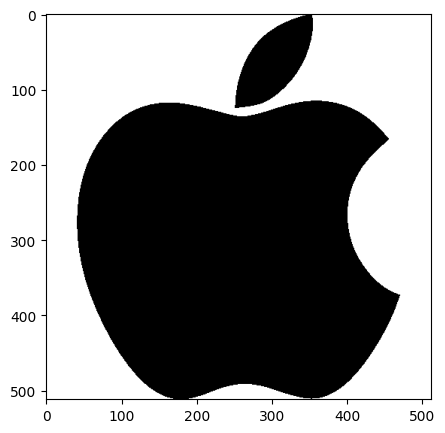

In [118]:
import numpy as np
import cv2
from PIL import Image
img = Image.open('test/사과.png').convert('L')
mask1 = np.array(img)

plt.figure(figsize=(5,5))
plt.imshow(mask1, cmap='gray')
mask.shape

(512, 512)

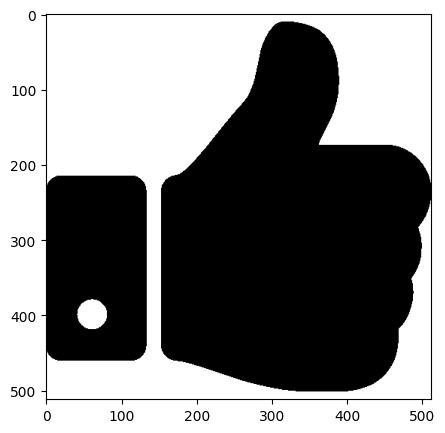

In [117]:
import numpy as np
import cv2
from PIL import Image
img = Image.open('test/따봉.png').convert('L')
mask2 = np.array(img)

plt.figure(figsize=(5,5))
plt.imshow(mask1, cmap='gray')
mask.shape

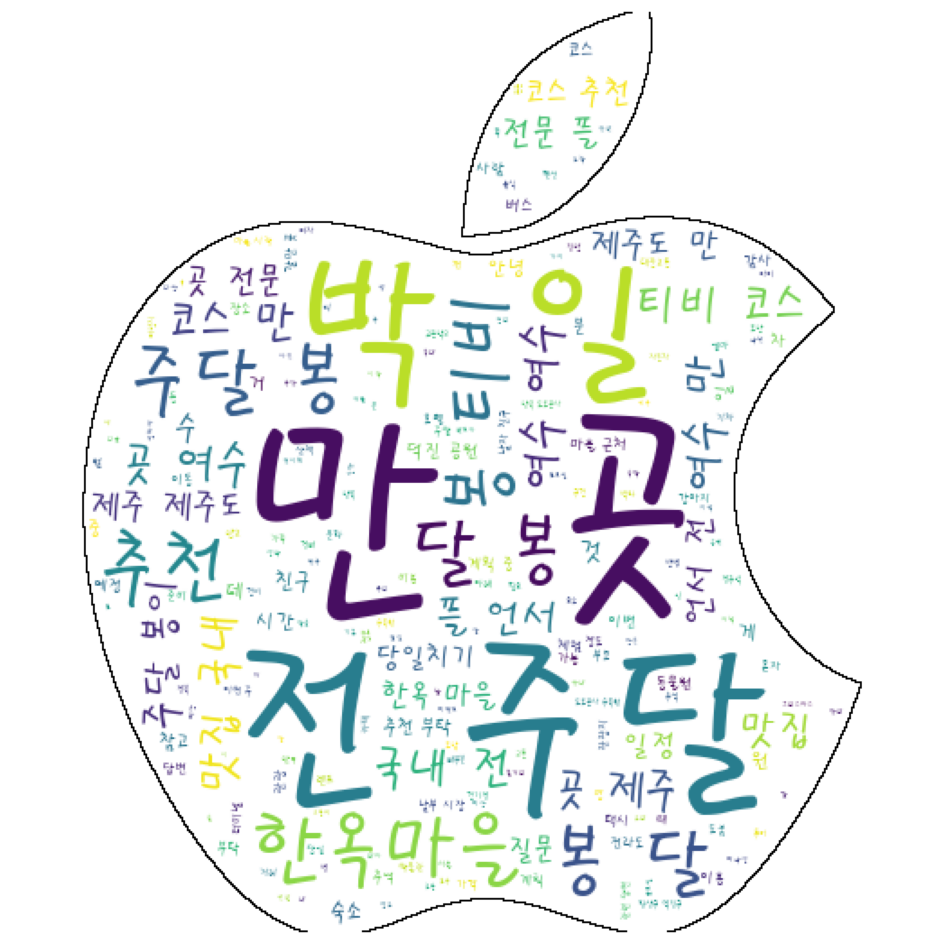

In [192]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordcloud = WordCloud(font_path='‪C:\Windows\Fonts\HMFMPYUN.TTF',
                  width=800,
                  height= 550,
                  background_color='white',
                  max_words=200,
                  colormap='viridis',
                  mask=mask1,
                  contour_color='black',
                  contour_width=1,
                  stopwords=불용어,)
wordcloud.generate(jeonju_data)
plt.figure(figsize=(25,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

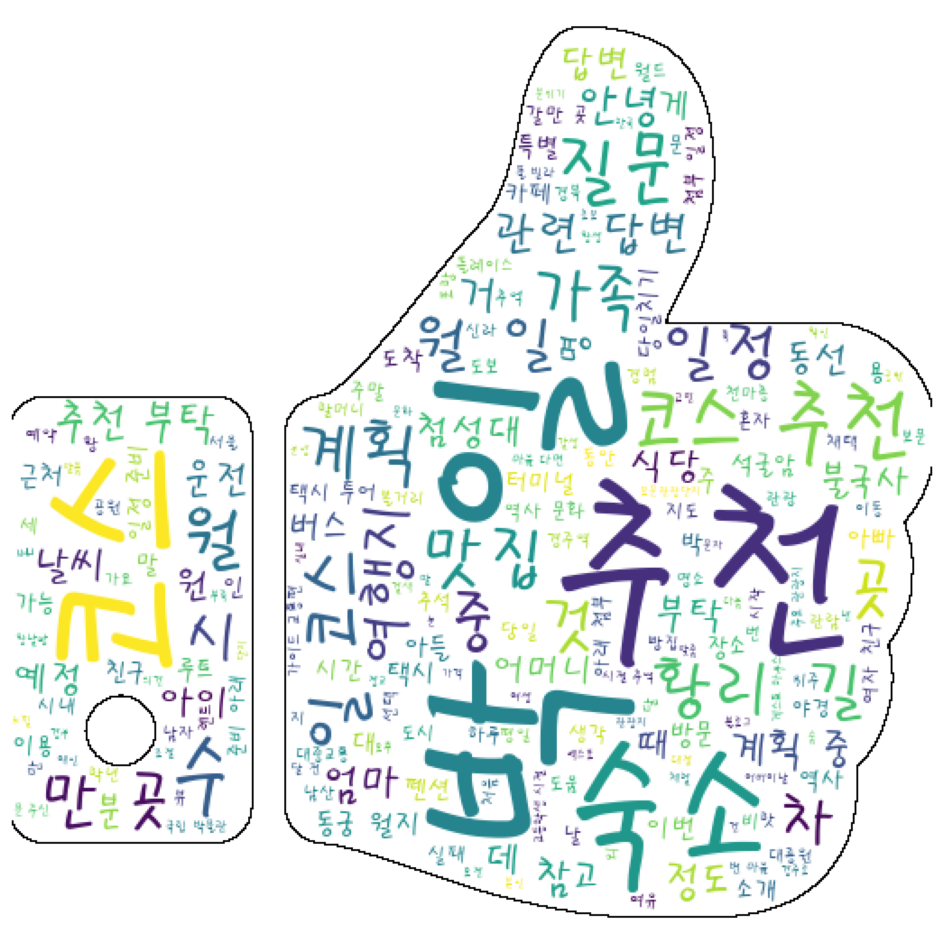

In [193]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wordcloud = WordCloud(font_path='‪C:\Windows\Fonts\HMFMPYUN.TTF',
                  width=800,
                  height= 550,
                  background_color='white',
                  max_words=200,
                  colormap='viridis',
                  mask=mask2,
                  contour_color='black',
                  contour_width=1,
                  stopwords=불용어)
wordcloud.generate(gyeongju_data)
plt.figure(figsize=(25,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
from nltk.tag import pos_tag


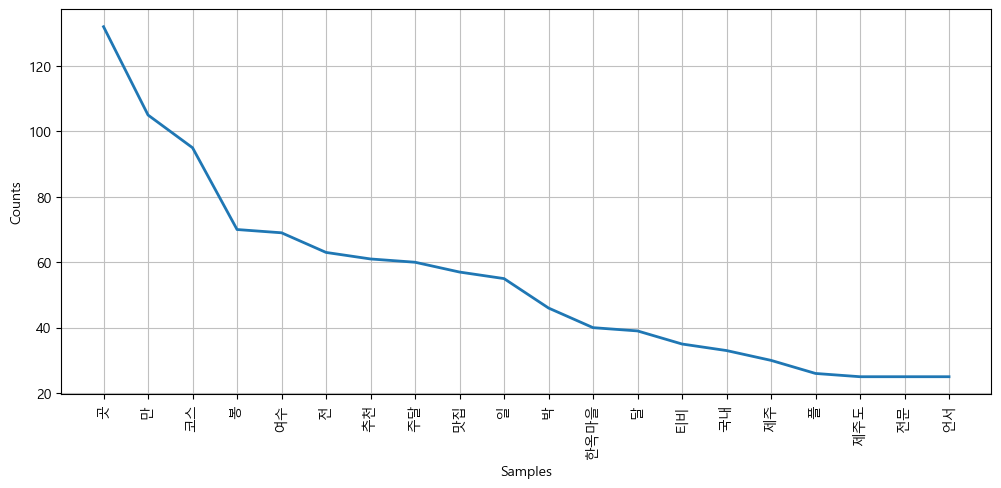

In [203]:
data_text1 = nltk.Text(first_word)
# data_text1
plt.figure(figsize=(12,5))
plt.rc('font', family='Malgun Gothic')
data_text1.plot(20)
plt.show()

In [202]:
data_text1.vocab().most_common(20)

[('곳', 132),
 ('만', 105),
 ('코스', 95),
 ('봉', 70),
 ('여수', 69),
 ('전', 63),
 ('추천', 61),
 ('주달', 60),
 ('맛집', 57),
 ('일', 55),
 ('박', 46),
 ('한옥마을', 40),
 ('달', 39),
 ('티비', 35),
 ('국내', 33),
 ('제주', 30),
 ('플', 26),
 ('제주도', 25),
 ('전문', 25),
 ('언서', 25)]

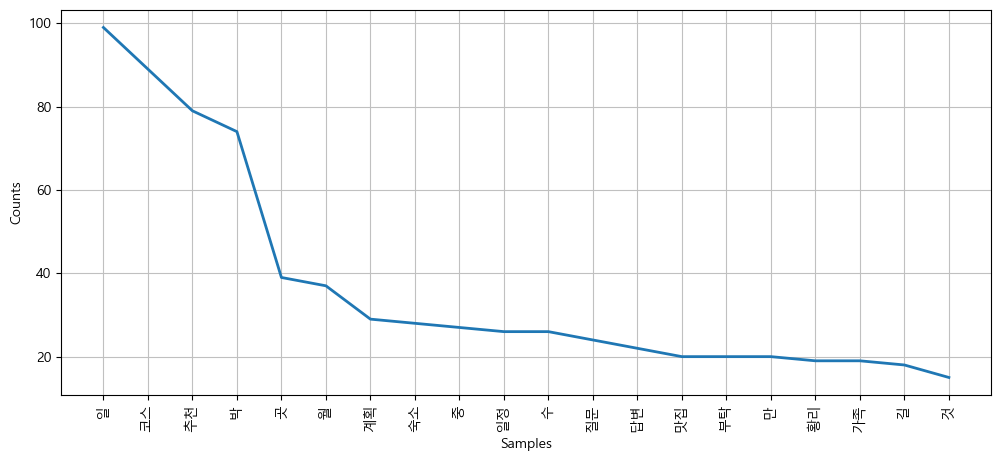

In [200]:
data_text2 = nltk.Text(second_word)
# data_text2
plt.figure(figsize=(12,5))
plt.rc('font', family='Malgun Gothic')
data_text2.plot(20)
plt.show()

In [201]:
data_text2.vocab().most_common(20)

[('일', 99),
 ('코스', 89),
 ('추천', 79),
 ('박', 74),
 ('곳', 39),
 ('월', 37),
 ('계획', 29),
 ('숙소', 28),
 ('중', 27),
 ('일정', 26),
 ('수', 26),
 ('질문', 24),
 ('답변', 22),
 ('맛집', 20),
 ('부탁', 20),
 ('만', 20),
 ('황리', 19),
 ('가족', 19),
 ('길', 18),
 ('것', 15)]

# 워드임베딩

In [2]:
from konlpy.tag import Okt,Kkma,Komoran,Mecab
from gensim.models import Word2Vec
import pandas as pd
from mecab import MeCab


In [12]:
import re
def clean_text(text):
    text = str(text) # Nan 방지
    return re.sub(r'[^a-zA-Z0-9가-힣\s]', '', text)

df1['jj_text'] = (df1['title']+df1['description']).apply(clean_text)
df1.to_csv('test/naver_jj.csv',index=False, sep='\t')

In [243]:
len(df1['jj_text'])

100

In [244]:
len(df2['gj_text'])

100

In [11]:
df2['gj_text'] = (df2['title']+df2['description']).apply(clean_text)
df2.to_csv('test/naver_gj.csv', index=False, sep='\t')

In [ ]:
시리즈 -> 리스트 (for문) : 1줄씩 : 
        보통명사, 고유명사 

In [266]:
from konlpy.tag import Mecab
data_jj = df1['jj_text'].tolist()
data_gj = df2['gj_text'].tolist()

data_jj_finally = []
for row in data_jj:
    tagged_jj = mecab.pos(row)
    filtered1 = [word for word, tag in tagged_jj if tag in ['NNG','NNP'] and len(word) > 2]
    data_jj_finally.append(filtered1)
    
    
data_gj_finally = []
for row in data_gj:
    tagged_gj = mecab.pos(row)
    filtered2 = [word for word, tag in tagged_gj if tag in ['NNG','NNP'] and len(word) > 2]
    data_gj_finally.append(filtered2)
print(data_jj_finally)
print(data_gj_finally)

[['박물관', '여행지', '카페이'], [], ['한옥마을'], ['여학생', '여학생', '오타쿠'], ['한옥마을', '완산구', '덕진구'], ['토요일', '데이트', '한옥마을'], [], ['영화제', '주목적', '전주국', '영화제', '알짜배기'], ['한옥마을', '한옥마을', '한옥마을'], ['한옥마을', '관광지', '이벤트', '관광공사', '페스타', '이벤트'], ['렌트카', '자동차', '자동차'], ['장단점'], ['분위기'], ['주세요', '한옥마을', '완산구', '덕진구', '완산구', '덕진구', '여행지'], ['고속버스', '교통수단'], ['당일치기', '당일치기', '한옥마을', '당일치기', '한옥마을', '한옥마을'], [], [], ['여행지', '보리암', '다랭이', '한옥마을'], ['제주도'], ['전라도', '제주도'], ['교통비'], ['제주도'], ['당일치기', '박물관', '미술관', '스토리', '예약금', '선착순'], ['한옥마을', '관광지'], ['제주도', '대중교통'], ['제주도'], ['제주도'], ['유적지', '전통문화', '한옥마을'], ['대중교통', '렌트카', '대중교통'], ['한옥마을', '동물원', '한국도로공사', '수목원'], ['제주도'], ['제주도'], ['볼거리'], ['교통비'], ['제주도', '한옥마을', '입장료'], [], ['크리스마스', '제주도'], [], ['수학여행'], ['터미널'], ['전시회', '한옥마을', '전시회'], ['더클래식', '금요일', '대중교통'], [], ['제주도'], ['가운데', '박물관', '수목원'], [], ['강아지', '강아지', '강아지', '강아지'], ['제주도', '터미널'], ['어머니'], ['당일치기', '당일치기', '제주도'], ['김선용', '변호사'], ['한옥마을', '천차만별'], ['고등학교', '당일치기', '고등학교', '고등학교'], ['음식점', '웨이

In [269]:
model1 = Word2Vec(data_jj_finally,
                 window=10,
                 min_count=2,
                 workers=-1)

In [270]:
model1.wv.most_similar('바닷가')

[('덕진구', 0.15878424048423767),
 ('토요일', 0.14262472093105316),
 ('관광지', 0.12757477164268494),
 ('경기전', 0.11093489825725555),
 ('영화제', 0.0956803634762764),
 ('사투리', 0.08456382155418396),
 ('교통비', 0.07523809373378754),
 ('최고봉', 0.0694953203201294),
 ('볼거리', 0.0670456811785698),
 ('완산구', 0.06291315704584122)]

In [271]:
model2 = Word2Vec(data_gj_finally,
                 window=10,
                 min_count=2,
                 workers=-1)

In [275]:
model2.wv.most_similar('천마총')

[('게스트', 0.24666325747966766),
 ('렌트카', 0.13367131352424622),
 ('오푸스', 0.12280812859535217),
 ('할머니', 0.1193675547838211),
 ('당일치기', 0.11928389966487885),
 ('대릉원', 0.1166219711303711),
 ('황남빵', 0.11093491315841675),
 ('블로그', 0.10689602047204971),
 ('고등학생', 0.09614861011505127),
 ('어르신', 0.08790988475084305)]

In [15]:
df1 = pd.read_csv('test/naver_jj.csv', sep='\t')

In [16]:
df2 = pd.read_csv('test/naver_gj.csv', sep='\t')

In [20]:
jj_text_list = df1['jj_text'].to_list()
jj_text_list[:2]

['전주 가볼만한곳 추천 받아요 추억의 7080 다양한체험 7080감성 추억여행 테마박물관 유익한시간 2 전북 전북투어패스 통합이용권 전북핫플 여러여행지 다양한체험 카페이용추가 전주여행필수 편안하고 즐거운 날이 되시길 바라겠습니다 감사합니다 ',
 '전주여행갈려고하는데요전주여행을 갈려고하는데요아는사람과 갈려고하는데 호텔은 좋은가격에 정했고 음2박3일여행인데 얼마정도갖고가면좋을까요그리고 맛집같은거 카페같은거 추천해주세요 안녕하세요 전주 여행 계획 중이시네요 한옥마을 근처 ']

In [21]:
gj_text_list = df2['gj_text'].to_list()
gj_text_list[:2]

['추석에 경주 여행추석에 경주 여행 가는거 어떻게 생각하시나요 서울에서 버스를 타고 갈 경우 버스가 버스전용 차선에서 운행하나요 질문하신 추석 경주여행 관련 답변 드리도록 하겠습니다 첨성대 석굴암 불국사 등 유적지는 연중무휴로 ',
 '1박2일 경주 여행 일정 짜주세요1박2일 경주 여행 일정 짜주세요 질문자님 경주에서의 1박 2일 여행을 계획 중이시군요 특히 소록스테이에서의 아래에 경주 여행 일정을 간략히 정리해 드릴게요 1박 2일 경주 여행 일정 Day 1 감성 가득한 경주 탐방 1030 ']

In [ ]:
from konlpy.tag import Komoran,Kkma,Hannanum,Okt
from mecab import MeCab
analyzer = MeCab()
total_noun_list = []
for total_text in jj_text_list:
    noun